In [ ]:
%tensorflow_version 1.x 
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.__version__
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

TensorFlow 1.x selected.


In [ ]:
# data preparation
data = input_data.read_data_sets('data/MNIST/', one_hot=True);
train_num = data.train.num_examples
valid_num = data.validation.num_examples
test_num = data.test.num_examples
img_flatten = 784
img_size = 28
num_classes = 10
print("Training Dataset Size:",train_num)
print("Validation Dataset Size:",valid_num)
print("Testing Dataset Size:",test_num)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [ ]:
# calcualte the parameters
def parameter_count():
    total_parameters = 0
    for variable in tf.trainable_variables():
        print(variable)
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        total_parameters += variable_parameters
    print("Total Parameter: ",total_parameters)
    return total_parameters


In [ ]:
# model 1
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=16,kernel_size=5,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=2,strides=2);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);
param1 = parameter_count()
print('Model_1 total parameters:',param1)
train_loss_list1 = []
train_acc_list1 = []
test_loss_list1 = []
test_acc_list1 = []

session = tf.Session()
session.run(tf.global_variables_initializer())
BATCH_SIZE = 64
EPOCH = 1
for i in range(EPOCH):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):

        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list1.append(train_loss)
    train_acc_list1.append(train_acc)
    test_loss, test_acc = session.run([loss,acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list1.append(test_loss)
    test_acc_list1.append(test_acc)
    msg = "Epoch: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.6}, Test Accuracy: {4:>6.1%}"
    print(msg.format(i, train_loss, train_acc, test_loss, test_acc))


Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 8) dtype=float32_ref>
<tf.Variable 'conv2d/bias:0' shape=(8,) dtype=float32_ref>
<tf.Variable 'conv2d_1/kernel:0' shape=(5, 5, 8, 16) dtype=float32_ref>
<tf.Variable 'conv2d_1/bias:0' shape=(16,) dtype=float32_ref>
<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32_ref>
<tf.Variable 'dense/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'dense_1/kernel:0' shape=(1

In [ ]:
#model 2
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=1,kernel_size=3,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=1,kernel_size=3,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=4,strides=4);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=10,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);

param2 = parameter_count()
print("Model_2 Parameter:",param2)
train_loss_list2= []
train_acc_list2 = []
test_loss_list2= []
test_acc_list2= []

session = tf.Session()
session.run(tf.global_variables_initializer())
BATCH_SIZE = 64
EPOCH = 1
for i in range(EPOCH):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):

        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    test_loss, test_acc = session.run([loss,acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    train_loss_list2.append(train_loss)
    train_acc_list2.append(train_acc)
    test_loss_list2.append(test_loss)
    test_acc_list2.append(test_acc)
    msg = "Epoch: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.6}, Test Accuracy: {4:>6.1%}"
    print(msg.format(i, train_loss, train_acc, test_loss, test_acc))

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 1) dtype=float32_ref>
<tf.Variable 'conv2d/bias:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 1, 1) dtype=float32_ref>
<tf.Variable 'conv2d_1/bias:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'dense/kernel:0' shape=(9, 10) dtype=float32_ref>
<tf.Variable 'dense/bias:0' shape=(10,) dtype=float32_ref>
<tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32_ref>
<tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32_ref>
Total Parameter:  230
Model_2 Parameter: 230
Epoch:      0, Training Loss: 0.783361, Training Accuracy:  75.0%, Test Loss: 0.68908, Test Accuracy:  78.5%


In [ ]:
#model 3 
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=1,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=1,kernel_size=5,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=4,strides=4);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=10,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);

param3 = parameter_count()

train_loss_list3= []
train_acc_list3 = []
test_loss_list3 = []
test_acc_list3 = []

session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = 64
EPOCH = 1
for i in range(EPOCH):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):

        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    test_loss, test_acc = session.run([loss,acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    train_loss_list3.append(train_loss)
    train_acc_list3.append(train_acc)
    test_loss_list3.append(test_loss)
    test_acc_list3.append(test_acc)
    msg = "Epoch: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.6}, Test Accuracy: {4:>6.1%}"
    print(msg.format(i, train_loss, train_acc, test_loss, test_acc))

<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 1) dtype=float32_ref>
<tf.Variable 'conv2d/bias:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'conv2d_1/kernel:0' shape=(5, 5, 1, 1) dtype=float32_ref>
<tf.Variable 'conv2d_1/bias:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'dense/kernel:0' shape=(9, 10) dtype=float32_ref>
<tf.Variable 'dense/bias:0' shape=(10,) dtype=float32_ref>
<tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32_ref>
<tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32_ref>
Total Parameter:  262
Epoch:      0, Training Loss: 0.673721, Training Accuracy:  75.0%, Test Loss: 0.685094, Test Accuracy:  78.4%


In [ ]:
# model 4
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=2,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=2,kernel_size=5,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=4,strides=4);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=10,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);

param4= parameter_count()
train_loss_list4= []
train_acc_list4 = []
test_loss_list4 = []
test_acc_list4 = []

session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = 64
EPOCH = 1
for i in range(EPOCH):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):

        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
        
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    test_loss, test_acc = session.run([loss,acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    train_loss_list4.append(train_loss)
    train_acc_list4.append(train_acc)
    test_loss_list4.append(test_loss)
    test_acc_list4.append(test_acc)
    msg = "Epoch: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.6}, Test Accuracy: {4:>6.1%}"
    print(msg.format(i, train_loss, train_acc, test_loss, test_acc))

<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 2) dtype=float32_ref>
<tf.Variable 'conv2d/bias:0' shape=(2,) dtype=float32_ref>
<tf.Variable 'conv2d_1/kernel:0' shape=(5, 5, 2, 2) dtype=float32_ref>
<tf.Variable 'conv2d_1/bias:0' shape=(2,) dtype=float32_ref>
<tf.Variable 'dense/kernel:0' shape=(18, 10) dtype=float32_ref>
<tf.Variable 'dense/bias:0' shape=(10,) dtype=float32_ref>
<tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32_ref>
<tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32_ref>
Total Parameter:  454
Epoch:      0, Training Loss: 0.363747, Training Accuracy:  89.1%, Test Loss: 0.258208, Test Accuracy:  92.1%


In [ ]:
#model 5
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=2,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=4,kernel_size=5,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=4,strides=4);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=10,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);

param5 = parameter_count()
train_loss_list5= []
train_acc_list5 = []
test_loss_list5 = []
test_acc_list5 = []

session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = 64
EPOCH = 1
for i in range(EPOCH):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):

        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    test_loss, test_acc = session.run([loss,acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    train_loss_list5.append(train_loss)
    train_acc_list5.append(train_acc)
    test_loss_list5.append(test_loss)
    test_acc_list5.append(test_acc)
    msg = "Epoch: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.6}, Test Accuracy: {4:>6.1%}"
    print(msg.format(i, train_loss, train_acc, test_loss, test_acc))

<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 2) dtype=float32_ref>
<tf.Variable 'conv2d/bias:0' shape=(2,) dtype=float32_ref>
<tf.Variable 'conv2d_1/kernel:0' shape=(5, 5, 2, 4) dtype=float32_ref>
<tf.Variable 'conv2d_1/bias:0' shape=(4,) dtype=float32_ref>
<tf.Variable 'dense/kernel:0' shape=(36, 10) dtype=float32_ref>
<tf.Variable 'dense/bias:0' shape=(10,) dtype=float32_ref>
<tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32_ref>
<tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32_ref>
Total Parameter:  736
Epoch:      0, Training Loss: 0.217354, Training Accuracy:  93.8%, Test Loss: 0.320053, Test Accuracy:  89.6%


In [ ]:
#model 6

tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=4,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=6,kernel_size=5,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=4,strides=4);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=10,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);

param6 = parameter_count()

train_loss_list6= []
train_acc_list6 = []
test_loss_list6 = []
test_acc_list6 = []

session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = 64
EPOCH = 1
for i in range(EPOCH):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):

        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    test_loss, test_acc = session.run([loss,acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    train_loss_list6.append(train_loss)
    train_acc_list6.append(train_acc)
    test_loss_list6.append(test_loss)
    test_acc_list6.append(test_acc)
    msg = "Epoch: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.6}, Test Accuracy: {4:>6.1%}"
    print(msg.format(i, train_loss, train_acc, test_loss, test_acc))

<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 4) dtype=float32_ref>
<tf.Variable 'conv2d/bias:0' shape=(4,) dtype=float32_ref>
<tf.Variable 'conv2d_1/kernel:0' shape=(5, 5, 4, 6) dtype=float32_ref>
<tf.Variable 'conv2d_1/bias:0' shape=(6,) dtype=float32_ref>
<tf.Variable 'dense/kernel:0' shape=(54, 10) dtype=float32_ref>
<tf.Variable 'dense/bias:0' shape=(10,) dtype=float32_ref>
<tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32_ref>
<tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32_ref>
Total Parameter:  1370
Epoch:      0, Training Loss: 0.385215, Training Accuracy:  87.5%, Test Loss: 0.246442, Test Accuracy:  92.1%


In [ ]:
#model 7

tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=4,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=4,kernel_size=5,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=2,strides=2);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=10,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);

param7 = parameter_count()

train_loss_list7= []
train_acc_list7 = []
test_loss_list7 = []
test_acc_list7 = []

session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = 64
EPOCH = 1
for i in range(EPOCH):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):

        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    test_loss, test_acc = session.run([loss,acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    train_loss_list7.append(train_loss)
    train_acc_list7.append(train_acc)
    test_loss_list7.append(test_loss)
    test_acc_list7.append(test_acc)
    msg = "Epoch: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.6}, Test Accuracy: {4:>6.1%}"
    print(msg.format(i, train_loss, train_acc, test_loss, test_acc))

<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 4) dtype=float32_ref>
<tf.Variable 'conv2d/bias:0' shape=(4,) dtype=float32_ref>
<tf.Variable 'conv2d_1/kernel:0' shape=(5, 5, 4, 4) dtype=float32_ref>
<tf.Variable 'conv2d_1/bias:0' shape=(4,) dtype=float32_ref>
<tf.Variable 'dense/kernel:0' shape=(196, 10) dtype=float32_ref>
<tf.Variable 'dense/bias:0' shape=(10,) dtype=float32_ref>
<tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32_ref>
<tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32_ref>
Total Parameter:  2588
Epoch:      0, Training Loss: 0.129997, Training Accuracy:  96.9%, Test Loss: 0.139745, Test Accuracy:  95.8%


In [ ]:
#model 8
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=4,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=2,strides=2);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=10,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);

param8 = parameter_count()
train_loss_list8= []
train_acc_list8 = []
test_loss_list8 = []
test_acc_list8 = []

session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = 64
EPOCH = 1
for i in range(EPOCH):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):

        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    test_loss, test_acc = session.run([loss,acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    train_loss_list8.append(train_loss)
    train_acc_list8.append(train_acc)
    test_loss_list8.append(test_loss)
    test_acc_list8.append(test_acc)
    msg = "Epoch: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.6}, Test Accuracy: {4:>6.1%}"
    print(msg.format(i, train_loss, train_acc, test_loss, test_acc))

<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 4) dtype=float32_ref>
<tf.Variable 'conv2d/bias:0' shape=(4,) dtype=float32_ref>
<tf.Variable 'conv2d_1/kernel:0' shape=(5, 5, 4, 8) dtype=float32_ref>
<tf.Variable 'conv2d_1/bias:0' shape=(8,) dtype=float32_ref>
<tf.Variable 'dense/kernel:0' shape=(392, 10) dtype=float32_ref>
<tf.Variable 'dense/bias:0' shape=(10,) dtype=float32_ref>
<tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32_ref>
<tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32_ref>
Total Parameter:  4952
Epoch:      0, Training Loss: 0.0877221, Training Accuracy: 100.0%, Test Loss: 0.230429, Test Accuracy:  94.2%


In [ ]:
#model 9
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=4,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=2,strides=2);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=32,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);

param9 = parameter_count()

train_loss_list9= []
train_acc_list9 = []
test_loss_list9 = []
test_acc_list9 = []

session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = 64
EPOCH = 1
for i in range(EPOCH):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):

        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    test_loss, test_acc = session.run([loss,acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    train_loss_list9.append(train_loss)
    train_acc_list9.append(train_acc)
    test_loss_list9.append(test_loss)
    test_acc_list9.append(test_acc)
    msg = "Epoch: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.6}, Test Accuracy: {4:>6.1%}"
    print(msg.format(i, train_loss, train_acc, test_loss, test_acc))

<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 4) dtype=float32_ref>
<tf.Variable 'conv2d/bias:0' shape=(4,) dtype=float32_ref>
<tf.Variable 'conv2d_1/kernel:0' shape=(5, 5, 4, 8) dtype=float32_ref>
<tf.Variable 'conv2d_1/bias:0' shape=(8,) dtype=float32_ref>
<tf.Variable 'dense/kernel:0' shape=(392, 32) dtype=float32_ref>
<tf.Variable 'dense/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'dense_1/kernel:0' shape=(32, 10) dtype=float32_ref>
<tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32_ref>
Total Parameter:  13818
Epoch:      0, Training Loss: 0.0728547, Training Accuracy:  98.4%, Test Loss: 0.0721625, Test Accuracy:  97.6%


In [ ]:
# model 10
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=6,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=24,kernel_size=5,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=2,strides=2);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=32,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);

param10 = parameter_count()
train_loss_list10 = []
train_acc_list10 = []
test_loss_list10 = []
test_acc_list10 = []

session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = 64
EPOCH = 1
for i in range(EPOCH):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):

        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list10.append(train_loss)
    train_acc_list10.append(train_acc)
    test_loss, test_acc = session.run([loss,acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list10.append(test_loss)
    test_acc_list10.append(test_acc)
    msg = "Epoch: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.6}, Test Accuracy: {4:>6.1%}"
    print(msg.format(i, train_loss, train_acc, test_loss, test_acc))

<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 6) dtype=float32_ref>
<tf.Variable 'conv2d/bias:0' shape=(6,) dtype=float32_ref>
<tf.Variable 'conv2d_1/kernel:0' shape=(5, 5, 6, 24) dtype=float32_ref>
<tf.Variable 'conv2d_1/bias:0' shape=(24,) dtype=float32_ref>
<tf.Variable 'dense/kernel:0' shape=(1176, 32) dtype=float32_ref>
<tf.Variable 'dense/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'dense_1/kernel:0' shape=(32, 10) dtype=float32_ref>
<tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32_ref>
Total Parameter:  41774
Epoch:      0, Training Loss: 0.0261412, Training Accuracy:  98.4%, Test Loss: 0.0641717, Test Accuracy:  98.0%


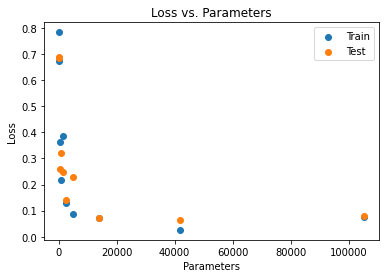

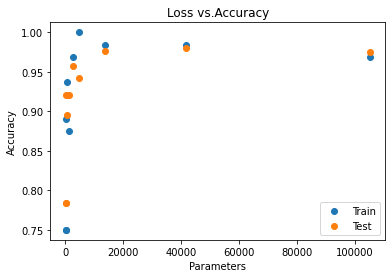

In [ ]:
# visualize the result
train_loss = np.concatenate([train_loss_list10,train_loss_list9,train_loss_list8,train_loss_list7,train_loss_list6,train_loss_list5,train_loss_list4,train_loss_list3,train_loss_list2,train_loss_list1])
train_acc= np.concatenate([train_acc_list10,train_acc_list9,train_acc_list8,train_acc_list7,train_acc_list6,train_acc_list5,train_acc_list4,train_acc_list3,train_acc_list2,train_acc_list1])
test_loss = np.concatenate([test_loss_list10,test_loss_list9,test_loss_list8,test_loss_list7,test_loss_list6,test_loss_list5,test_loss_list4,test_loss_list3,test_loss_list2,test_loss_list1])
test_acc= np.concatenate([test_acc_list10,test_acc_list9,test_acc_list8,test_acc_list7,test_acc_list6,test_acc_list5,test_acc_list4,test_acc_list3,test_acc_list2,test_acc_list1])
param= np.array([param10,param9,param8,param7,param6,param5,param4,param3,param2,param1])
plt.scatter(param,train_loss)
plt.scatter(param,test_loss)
plt.title('Loss vs. Parameters')
plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.pause(0.1)
plt.scatter(param,train_acc)
plt.scatter(param,test_acc)
plt.title('Loss vs.Accuracy')
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])